In [314]:
from src.utils import load_all_restaurants
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [315]:
df = load_all_restaurants("data\\raw")
df.head()

,title,description,n_reviews,stars_avg,price_range,extra_features,street,opening_hours,phone_number,reviews,extra_content,unique_id
0,Restaurante Abando,Restaurante de larga trayectoria con pinchos c...,3000,"4,3",€€,Tiene terraza· Tiene Wi-Fi· Sillas altas dispo...,"Colón de Larreátegui K., 31, Abando, 48009 Bil...","{'viernes': ['7:00–1:30'], 'sábado': ['7:00–1:...",944 24 57 79,['Agradable lugar para comer tanto a la carta ...,['Abando Bar Restaurante. Colón de Larreátegui...,"Restaurante Abando | Colón de Larreátegui K., ..."
1,"Bar-Restaurante ""La Roca""",NaN,11000,"4,2",20-30€,Ideal para ver deportes· Sillas altas disponib...,"Archivo Histórico Provincial, Ercilla Kalea, 1...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 50 09,"['No suelo poner reseñas, pero esta vez, lo me...",['... café baristas cerveza metodología de tir...,"Bar-Restaurante ""La Roca"" | Archivo Histórico ..."
2,La Gavilla Bilbao,Restaurante funcional y acogedor que ofrece pl...,11000,"4,5",30-40€,NaN,"Colón de Larreátegui K., N.32, Abando, 48009 B...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 68 38,"['Veamos, sólo comí cuatro pinchos que estaban...",['Céntrico establecimiento que se ha puesto ba...,"La Gavilla Bilbao | Colón de Larreátegui K., N..."
3,La Kedada Bilbao,Bar restaurante de un hotel moderno y de pared...,54,"4,0",NaN,Tiene terraza· Tiene comedor privado· Tiene Wi-Fi,"Rodríguez Arias K., 66, Bajo, Abando, 48013 Bi...","{'sábado': ['19:00–23:00'], 'domingo': ['19:00...",944 41 31 00,['La comida esta rica lo que pasa que algunos ...,['El restaurante Bar Restaurante La Kedada est...,"La Kedada Bilbao | Rodríguez Arias K., 66, Baj..."
4,Restaurante Aralar,NaN,883,"4,3",10-20€,Se puede bailar· Tiene Wi-Fi· Sillas altas dis...,"Ibáñez de Bilbao Kalea, nº 16, Abando, 48001 B...","{'sábado': ['12:00–21:00'], 'domingo': ['Cerra...",944 23 09 52,['No me gusta mucho ir a sitios de ningún part...,['Calle Ibáñez de Bilbao 16 Sabin Etxea. 48001...,"Restaurante Aralar | Ibáñez de Bilbao Kalea, n..."


In [316]:
#Información sobre las columnas.
df.info()

#Filtrar las columnas que tienen nulos.
nulos_por_columna = df.isnull().sum()
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

print("Número de nulos por columna:")
print(columnas_con_nulos)

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 97
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           835 non-null    object
 1   description     223 non-null    object
 2   n_reviews       835 non-null    int64 
 3   stars_avg       835 non-null    object
 4   price_range     734 non-null    object
 5   extra_features  358 non-null    object
 6   street          767 non-null    object
 7   opening_hours   832 non-null    object
 8   phone_number    409 non-null    object
 9   reviews         835 non-null    object
 10  extra_content   835 non-null    object
 11  unique_id       835 non-null    object
dtypes: int64(1), object(11)
memory usage: 84.8+ KB
Número de nulos por columna:
description       612
price_range       101
extra_features    477
street             68
opening_hours       3
phone_number      426
dtype: int64


Eliminamos la columna "unique_id" ya que es para pruebas de la parte de scrapear.

In [317]:
df = df.drop(columns=['unique_id'])

Modificar columnas "description" y "extra_features". 

In [318]:
df['info'] = df['description'].astype(str) + ' ' + df['extra_features'].astype(str)+ ' ' + df['extra_content'].astype(str)+ ' ' + df['reviews'].astype(str)
df = df.drop(columns=['description','extra_content','reviews'])

In [319]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\USUARIO.DESKTOP-
[nltk_data]     GN89KO5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\USUARIO.DESKTOP-
[nltk_data]     GN89KO5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [320]:
corpus = df['info'].astype(str).tolist()
stop_words = set(stopwords.words('spanish'))

processed_corpus = []

for document in corpus:
    words = [word.lower() for word in word_tokenize(document, language='spanish') if word.isalpha() and word.lower() not in stop_words and word.lower() != 'nan']

    processed_corpus.append(words)

#Reemplaza el contenido de la columna 'info' con su corpus correspondiente.
df['info'] = processed_corpus

print(df['info'])

0     [restaurante, larga, trayectoria, pinchos, com...
1     [ideal, ver, sillas, altas, admiten, perros, c...
2     [restaurante, funcional, acogedor, ofrece, pla...
3     [bar, restaurante, hotel, moderno, paredes, bl...
4     [puede, sillas, altas, disponibles, ibáñez, bi...
                            ...                        
90    [ene, gaztelu, pubs, bares, bilbao, opiniones,...
93    [sirve, comida, bar, bilbao, fotos, número, te...
94    [jaureguibeitia, ibarra, conocido, cocherito, ...
96    [multitud, recuerdos, enmarcados, decoran, tas...
97    [moderno, espacio, decorado, fotos, artistas, ...
Name: info, Length: 835, dtype: object


Ahora, cambiamos los valores de la columna "price_ranges". Primero, reemplazamos los nulos y los que tienen un símbolo de euro por el precio 10-20. Los que tienen doble símbolo de euro los cambiamos por 20-30.

In [321]:
df['price_range'] = df['price_range'].replace({
    'Más de 100€': '+100€',
    '€': '10-40€',
    '€€': '40-80€',
    '€€€': '+100€'
})

In [322]:
#Muestra la cantidad de valores únicos en la columna.
unique_prices = df['price_range'].value_counts()
print(unique_prices)

price_range
10-20€    265
1-10€     238
10-40€     71
40-80€     63
20-30€     47
+100€      17
1-20€      14
30-40€      6
10-30€      4
50-60€      4
20-40€      2
40-50€      2
70-80€      1
Name: count, dtype: int64


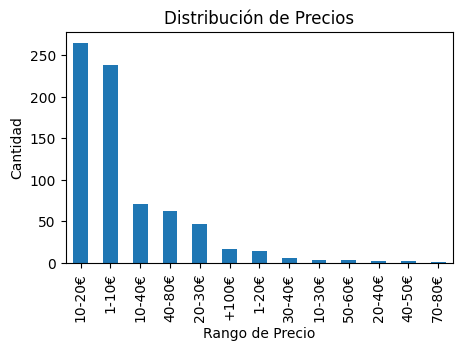

In [323]:
df['price_range'].value_counts().plot(kind='bar',figsize=(5, 3))

plt.title('Distribución de Precios')
plt.xlabel('Rango de Precio')
plt.ylabel('Cantidad')

plt.show()

Cambiamos el precio por 'barato','medio' o 'caro'.

In [324]:
#Función para asignar la categoría.
def categorize_price(price_range):
    # Verificar si el valor es un string
    if isinstance(price_range, str):
        # Dividir el rango de precios y obtener el último fragmento
        last_fragment = price_range.split('-')[-1]
        
        # Buscar números en el último fragmento
        numbers = re.findall(r'\d+', last_fragment)
        
        # Verificar si hay números encontrados
        if numbers:
            # Obtener el precio máximo del rango
            price_max = int(numbers[0])
            
            # Asignar categoría
            if price_max <= 10:
                return 'barato'
            elif price_max <= 20:
                return 'medio'
            else:
                return 'caro'
        else:
            # Manejar el caso donde no se encuentra ningún número
            return 'No válido'
    else:
        # Manejar el caso donde el valor no es un string
        return 'No válido'
    
    
df['price_range'] = df['price_range'].apply(categorize_price)

In [325]:
#Muestra la cantidad de valores únicos en la columna.
unique_prices = df['price_range'].value_counts()
print(unique_prices)

price_range
medio        279
barato       238
caro         217
No válido    101
Name: count, dtype: int64


Estudio de valores de la columna n_reviews.

In [326]:
#Muestra la cantidad de valores únicos en la columna.
unique_rev = df['n_reviews'].value_counts()
print(unique_rev)

n_reviews
13000    24
15000    15
11000    13
17000    12
12000    12
         ..
169       1
386       1
588       1
870       1
338       1
Name: count, Length: 460, dtype: int64


In [327]:
# Función para clasificar las reseñas
def classify_reviews(n_reviews):
    if n_reviews < 100:
        return "pocas_resenas"
    elif 100 <= n_reviews <= 800:
        return "medio_resenas"
    else:
        return "muchas_resenas"

# Aplicar la clasificación a la columna 'n_reviews'
df['n_reviews'] = df['n_reviews'].apply(classify_reviews)
# Convertir la columna 'review_category' a categórica
df['n_reviews'] = pd.Categorical(df['n_reviews'], categories=["pocas_resenas", "medio_resenas", "muchas_resenas"], ordered=True)

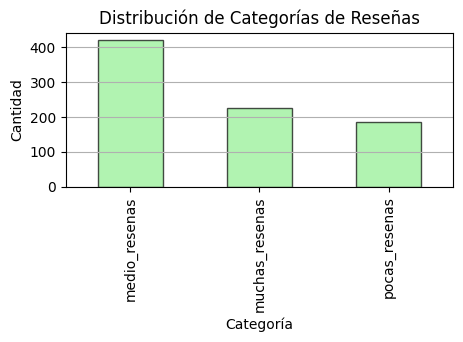

In [328]:
# Graficar la distribución de reseñas clasificadas
plt.figure(figsize=(5, 2))
df['n_reviews'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribución de Categorías de Reseñas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

In [329]:
'''def extract_opening_hours(row):
    opening_hours_dict = row['opening_hours']
    days_of_week = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
    for day in days_of_week:
        if day in opening_hours_dict:
            if isinstance(opening_hours_dict[day], list) and 'cerrado' not in opening_hours_dict[day]:
                row[day] = 1
            else:
                row[day] = 0
        else:
            row[day] = 0
    return row


# Aplicar la función a cada fila del DataFrame
df = df.apply(extract_opening_hours, axis=1)

# Eliminar la columna 'opening_hours' original si se desea
df.drop('opening_hours', axis=1, inplace=True)

df'''

"def extract_opening_hours(row):\n    opening_hours_dict = row['opening_hours']\n    days_of_week = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']\n    for day in days_of_week:\n        if day in opening_hours_dict:\n            if isinstance(opening_hours_dict[day], list) and 'cerrado' not in opening_hours_dict[day]:\n                row[day] = 1\n            else:\n                row[day] = 0\n        else:\n            row[day] = 0\n    return row\n\n\n# Aplicar la función a cada fila del DataFrame\ndf = df.apply(extract_opening_hours, axis=1)\n\n# Eliminar la columna 'opening_hours' original si se desea\ndf.drop('opening_hours', axis=1, inplace=True)\n\ndf"

In [330]:
corpus = df['extra_features'].astype(str).tolist()
stop_words = set(stopwords.words('spanish'))

processed_corpus = []

for document in corpus:
    words = [word.lower() for word in word_tokenize(document, language='spanish') if word.isalpha() and word.lower() not in stop_words and word.lower() != 'nan']

    processed_corpus.append(words)

#Reemplaza el contenido de la columna 'info' con su corpus correspondiente.
df['extra_features'] = processed_corpus

df['extra_features']

0                     [sillas, altas, disponibles]
1     [ideal, ver, sillas, altas, admiten, perros]
2                                               []
3                                        [comedor]
4              [puede, sillas, altas, disponibles]
                          ...                     
90                                              []
93                            [sirve, comida, bar]
94                                              []
96                                              []
97                                              []
Name: extra_features, Length: 835, dtype: object

In [331]:
pd.set_option('display.max_columns', None)

# Dividir las palabras en la columna 'extra_features' y crear variables dummy
dummies = df['extra_features'].str.get_dummies(sep=',')

# Concatenar las variables dummy al DataFrame original
df = pd.concat([df, dummies], axis=1)

# Limpiar nombres de las columnas
df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
# Eliminar la columna 'extra_features' si es necesario
df = df.drop('extra_features', axis=1)

# Mostrar el DataFrame resultante
df

,title,n_reviews,stars_avg,price_range,street,opening_hours,phone_number,info,acepta,aceptan,actuaciones,admiten,altas,bailar,bar,buenos,buenos,cambiador,cenas,comedor,comida,ccteles,deportes,directo,disponibles,da,entrega,exterior,hacer,hacer,happy,hour,hour,ideal,infantil,interior,juegos,men,mesa,mismo,msica,perros,perros,platos,platos,privado,puede,reserva,reservas,sillas,sirve,sirven,terraza,traer,veganos,vegetarianos,ver,ver,aceptan,aceptan,actuaciones,actuaciones,admiten,comedor,comedor,happy,ideal,karaoke,men,msica,obligatorio,ofrece,permite,puede,puede,sillas,sirve,sirven,solo,terraza,
0,Restaurante Abando,muchas_resenas,"4,3",caro,"Colón de Larreátegui K., 31, Abando, 48009 Bil...","{'viernes': ['7:00–1:30'], 'sábado': ['7:00–1:...",944 24 57 79,"[restaurante, larga, trayectoria, pinchos, com...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"Bar-Restaurante ""La Roca""",muchas_resenas,"4,2",caro,"Archivo Histórico Provincial, Ercilla Kalea, 1...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 50 09,"[ideal, ver, sillas, altas, admiten, perros, c...",0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,La Gavilla Bilbao,muchas_resenas,"4,5",caro,"Colón de Larreátegui K., N.32, Abando, 48009 B...","{'sábado': ['12:00–24:00'], 'domingo': ['Cerra...",944 25 68 38,"[restaurante, funcional, acogedor, ofrece, pla...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,La Kedada Bilbao,pocas_resenas,"4,0",No válido,"Rodríguez Arias K., 66, Bajo, Abando, 48013 Bi...","{'sábado': ['19:00–23:00'], 'domingo': ['19:00...",944 41 31 00,"[bar, restaurante, hotel, moderno, paredes, bl...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurante Aralar,muchas_resenas,"4,3",medio,"Ibáñez de Bilbao Kalea, nº 16, Abando, 48001 B...","{'sábado': ['12:00–21:00'], 'domingo': ['Cerra...",944 23 09 52,"[puede, sillas, altas, disponibles, ibáñez, bi...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Gaztelu bar-degustación,pocas_resenas,"4,1",caro,"Iturribide Zeharkalea, 4, Ibaiondo, 48006 Bilb...","{'miércoles': ['7:15–21:00'], 'jueves': ['7:15...",NaN,"[ene, gaztelu, pubs, bares, bilbao, opiniones,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
93,Bar Amaia,pocas_resenas,"4,8",caro,"Santutxu Kalea, 71, 48006 Bilbo, Bizkaia","{'miércoles': ['8:30–22:30'], 'jueves': ['8:30...",NaN,"[sirve, comida, bar, bilbao, fotos, número, te...",0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
94,Cocherito,pocas_resenas,"4,3",barato,"Cocherito de Bilbao Kalea, 1, 48004 Bilbo, Biz...","{'miércoles': ['6:30–22:00'], 'jueves': ['6:30...",NaN,"[jaureguibeitia, ibarra, conocido, cocherito, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
96,Xukela,muchas_resenas,"4,0",medio,"Txakur Kalea, 2, Ibaiondo, 48005 Bilbo, Bizkaia","{'miércoles': ['10:00–24:00'], 'jueves': ['10:...",NaN,"[multitud, recuerdos, enmarcados, decoran, tas...",0,0,0,0,0,0,0,